# Lab 2 - Part 1

Data analysis and graph generation for part one of Lab 2

In [5]:
import json
import pandas
import seaborn
import numpy
import matplotlib.pyplot as plt

# The sample data contains two runs, one at 32 seconds and another at 64 seconds. 
with open("sample.json", "r") as ifs:
    data = json.load(ifs)
items = []
endings = set()
for key, val in data.items():
    for old in val:
        for sub_key in old.keys():
            if "." in old[sub_key]:
                old[sub_key] = float(old[sub_key])
            else:
                try:
                    old[sub_key] = int(old[sub_key])
                except Exception:
                    pass
        old["run"] = key
        time = int(key.split("-")[-1])
        old["time"] = time
        endings.add(time)
        items.append(old)
frame = pandas.DataFrame(items)

# Only want the mixed runs, the other runs are more for proof of concept
mixed = frame[frame["run"].isin(["mixed-{}".format(x) for x in endings])]


/Users/forrest/miniconda3/envs/cs481-lab2/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


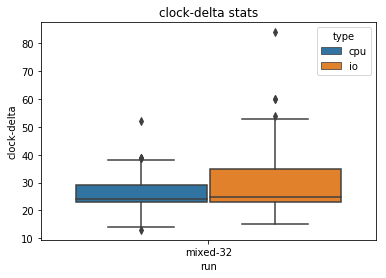

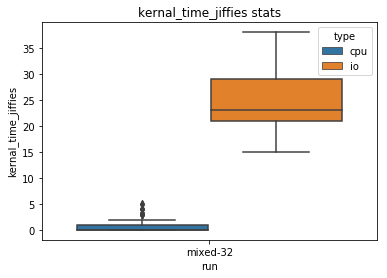

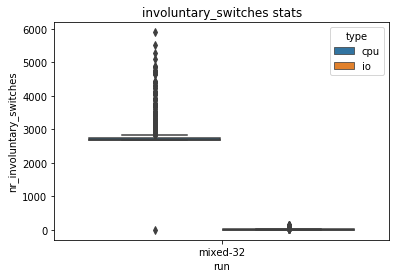

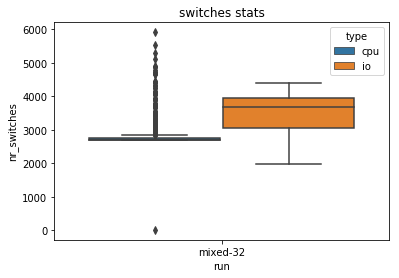

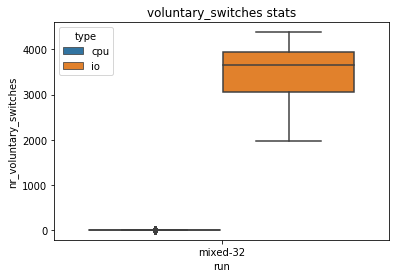

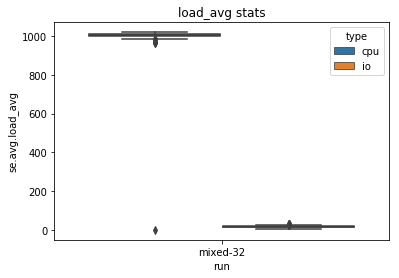

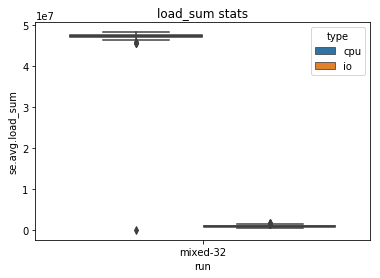

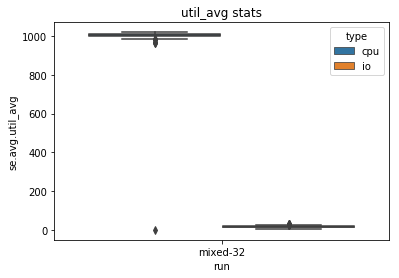

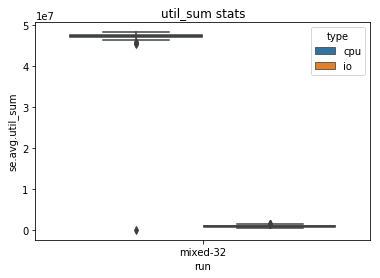

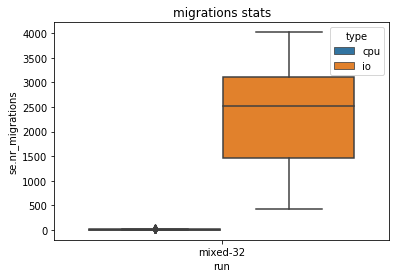

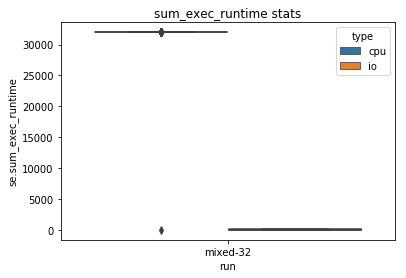

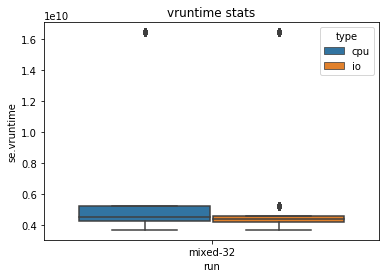

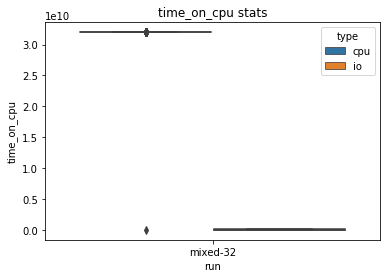

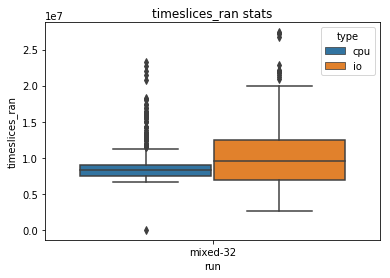

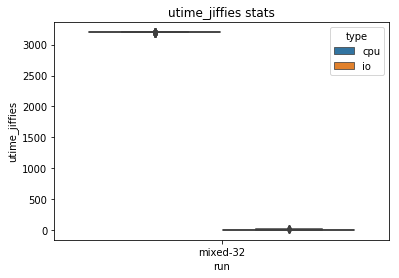

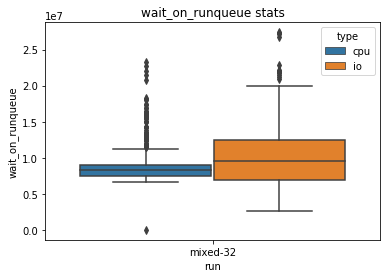

In [3]:
for idx, key in enumerate(mixed.columns):
    if key in ["se.avg.last_update_time", "se.exec_start", "time"]:
        continue
    if not isinstance(frame[key][0], (float, int, numpy.int64, numpy.float64)):
        continue
    if not frame[key][0]:
        continue
    subframe = mixed.copy()
    if len(getattr(subframe, key).unique()) == 1:
        continue
    subframe = subframe[subframe.time == 32]
    try:
        figure, axes = plt.subplots(nrows=1)
        axes.set_title("{} stats".format(key.split(".")[-1]).strip("nr_"))
        seaborn.boxplot(x="run", y=key, hue="type", data=subframe, ax=axes)
        figure.show()
    except Exception:
        pass

## Part 2 - Investigating Page Table Usage

Evaluating and graphing the data from part 2 of Lab 2

In [10]:
import json
from gzip import open as gzopen

with gzopen("lab-part-2-length-117-step-1-proc-102400-batches-32.json.gz", "r") as ifs:
    data = ifs.read().decode("utf-8")
data = json.loads(data)
data = list(data.values())[0]
print("Number of processes run:", len(data))

Number of processes run: 102400
<class 'dict'>


In [11]:
for obj in data:
    if not isinstance(obj, dict):
        print(obj)
    for key, val in obj.items():
        if str(val).isdigit():
            obj[key] = int(val)
        else:
            if isinstance(val, str):
                val = val.strip(" ")
                if val.endswith("kB"):
                    obj[key] = int(val.strip(" kB")) * 1024
frame = pandas.DataFrame(data)

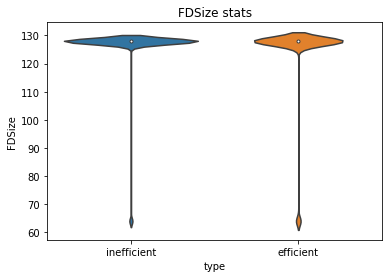

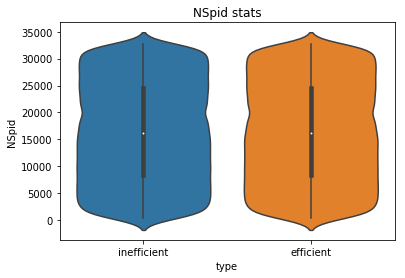

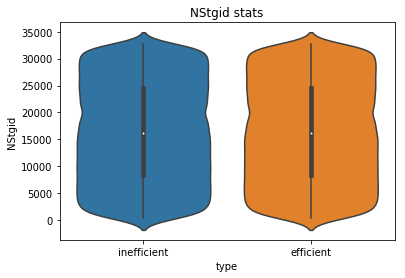

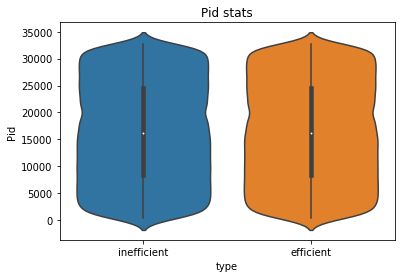

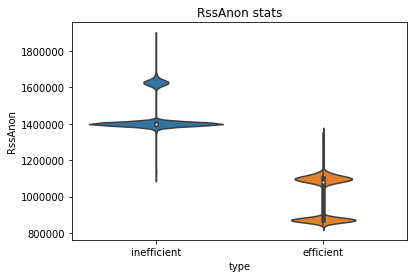

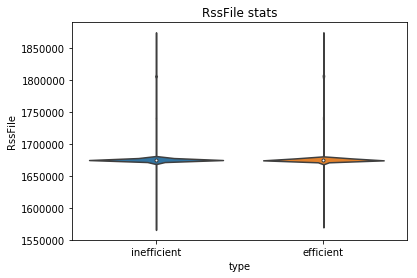

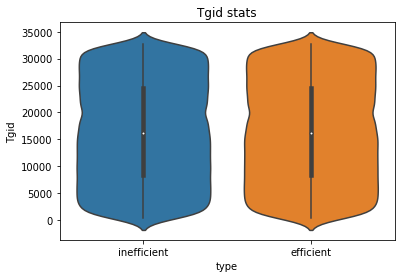

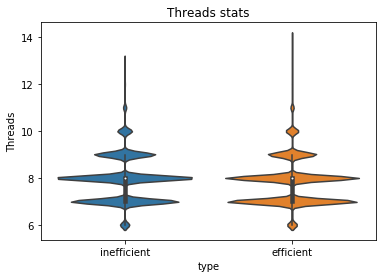

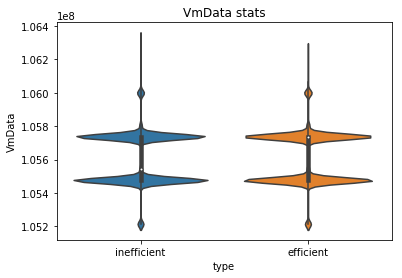

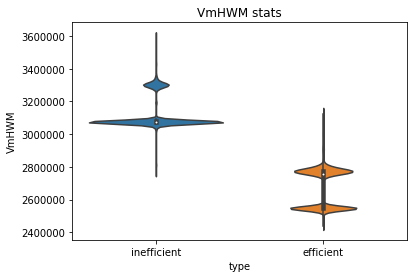

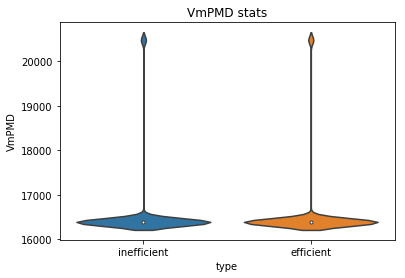

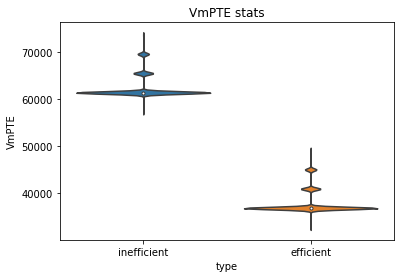

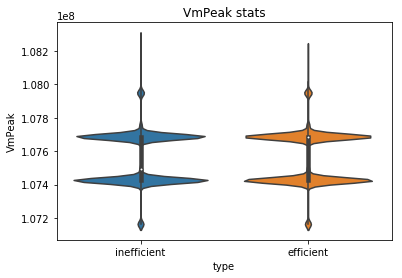

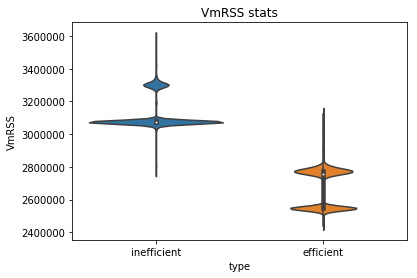

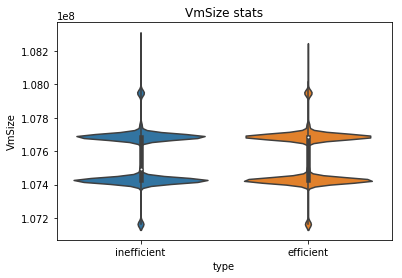

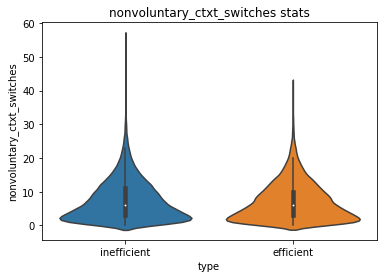

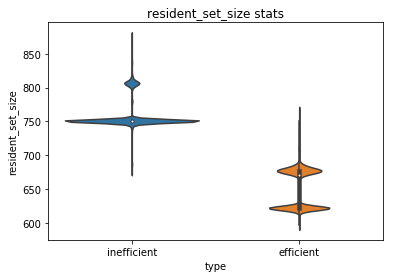

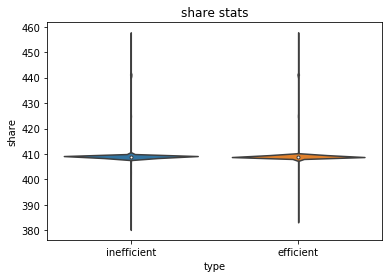

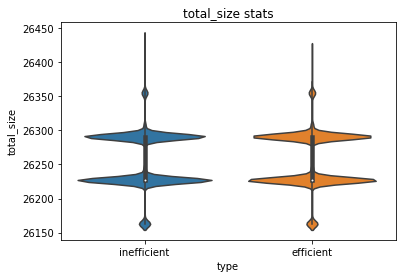

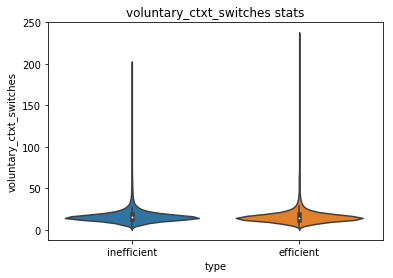

In [12]:
for idx, key in enumerate(frame.columns):
    if not isinstance(frame[key][0], (float, int, numpy.int64, numpy.float64)):
        continue
    if not frame[key][0]:
        continue
    subframe = frame.copy()
    if len(getattr(subframe, key).unique()) == 1:
        continue
    try:
        figure, axes = plt.subplots(nrows=1)
        axes.set_title("{} stats".format(key.split(".")[-1]))
        seaborn.violinplot(x="type", y=key, data=subframe, ax=axes)
        figure.show()
    except Exception:
        pass